1. Loading Data and Model Predictions
--------------------------------------------------------------------------------
Dataset shape: (34626, 3)
Sentiment distribution: {'positive': 32315, 'neutral': 1499, 'negative': 812}


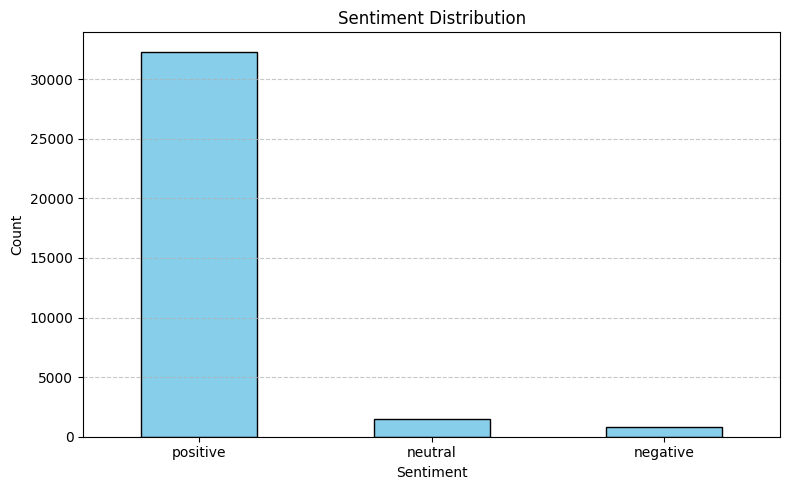


2. Load Model Predictions
--------------------------------------------------------------------------------
Resampled Distribution of Sentiment after SMOTE: Counter({'positive': 25851, 'neutral': 25851, 'negative': 25851})

3. Model Evaluation Framework
--------------------------------------------------------------------------------

4. Performance Evaluation
--------------------------------------------------------------------------------

===== Naive Bayes Per-Class Metrics =====
          precision    recall  f1-score  support
negative   0.183824  0.617284  0.283286    162.0
neutral    0.139796  0.456667  0.214062    300.0
positive   0.979452  0.818533  0.891792   6464.0

Naive Bayes Performance:
Accuracy: 0.7982
Precision: 0.4344
Recall: 0.6308
F1 Score: 0.4630

===== Logistic Regression Per-Class Metrics =====
          precision    recall  f1-score  support
negative   0.199536  0.530864  0.290051    162.0
neutral    0.149709  0.343333  0.208502    300.0
positive   0.970553  0.8719

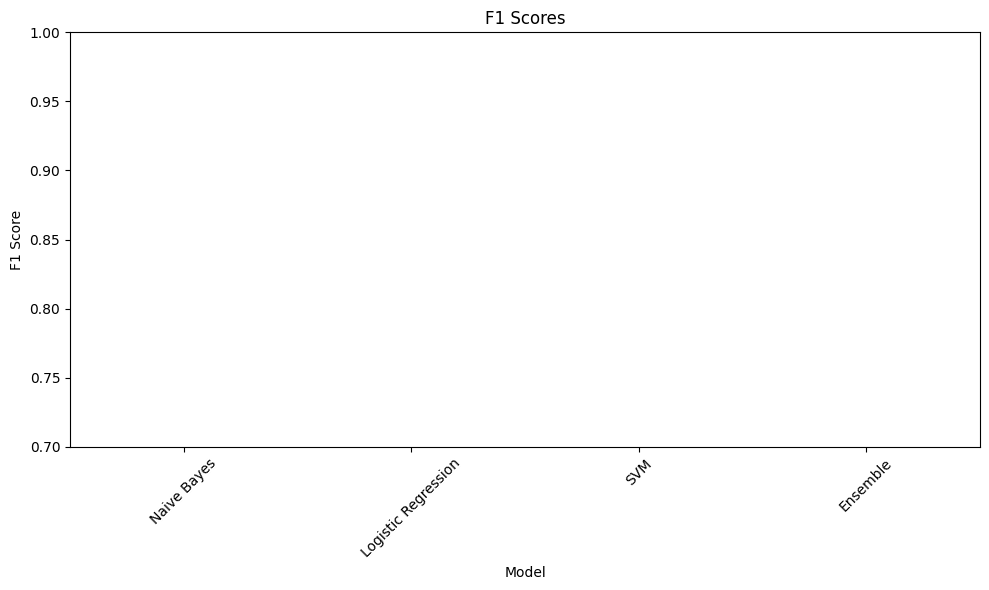

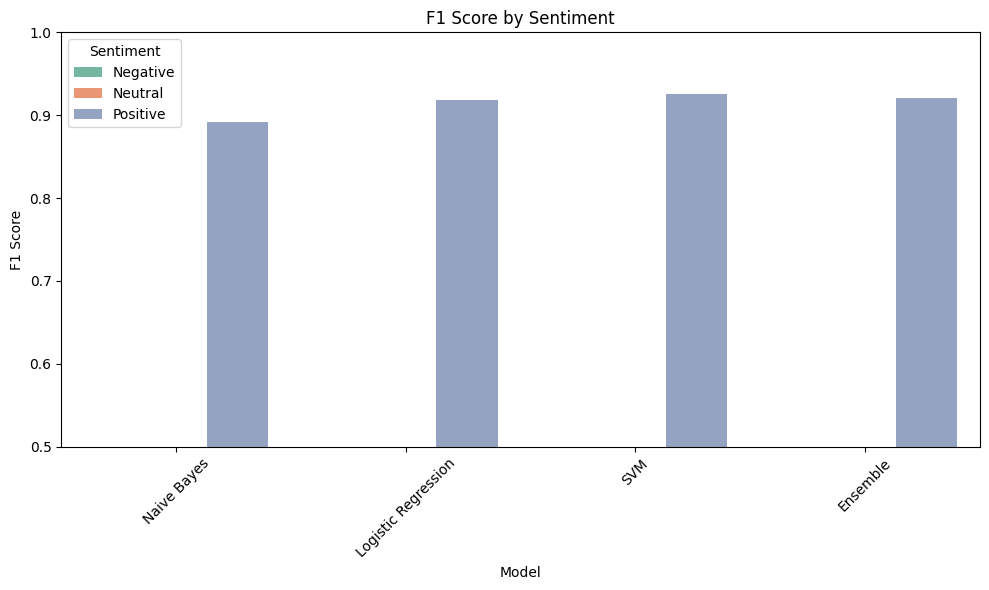


5. Confusion Matrices
--------------------------------------------------------------------------------


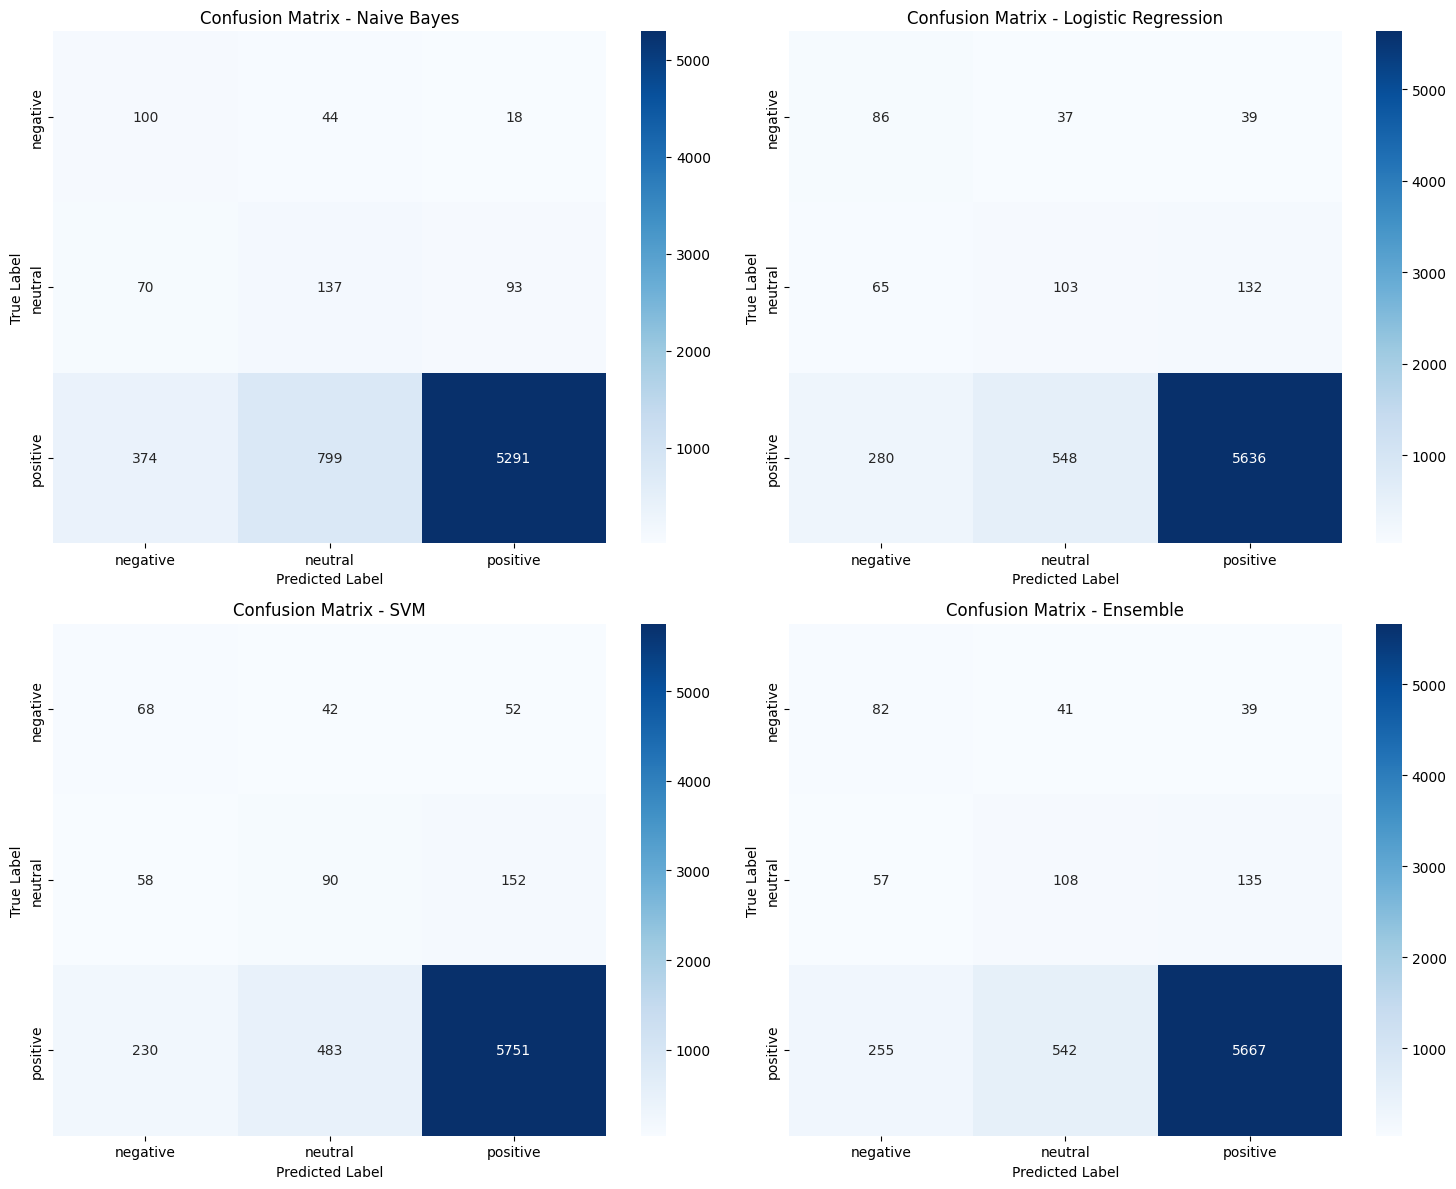


6. Error Analysis
--------------------------------------------------------------------------------
error analysis on the best model: Ensemble

Error Patterns:
       True Predicted  count
5  positive   neutral    542
4  positive  negative    255
3   neutral  positive    135
2   neutral  negative     57
0  negative   neutral     41
1  negative  positive     39


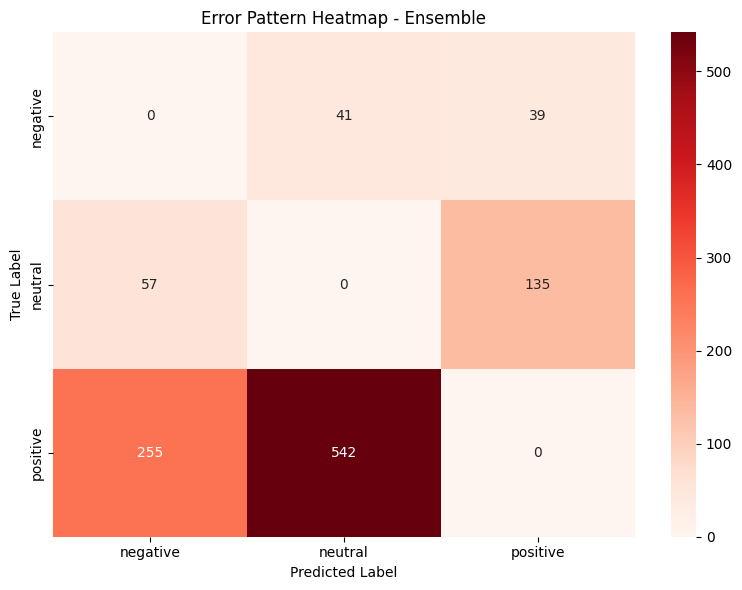


Sample misclassified examples:

Error type 1: positive misclassified as neutral
Text: If you have an Amazon Prime account, you should have a fire tablet. It is so easy to have Kindle books, Amazon music and videos at your finger tips. T...

Error type 2: positive misclassified as negative
Text: The paperwhite is so cool. I don't know why I didn't get it sooner....


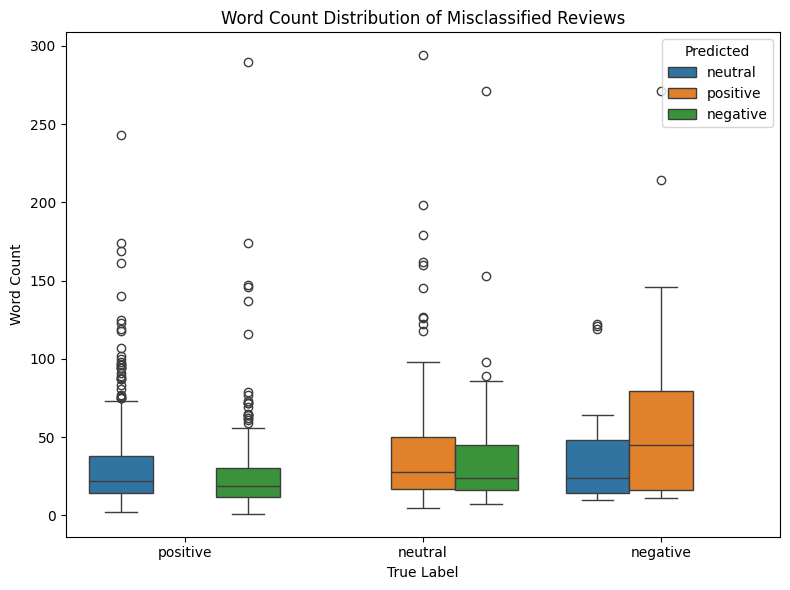


7. Feature Importance Analysis
--------------------------------------------------------------------------------

Top features for Negative sentiment:
  tablet children: 5.1862
  isnt good: 4.6604
  bb: 4.5245
  slow: 4.3579
  price awesome: 4.1527
  returned: 4.0184
  never: 3.8296
  waste: 3.7682
  love works: 3.7399
  downloaded: 3.7066

Top features for Neutral sentiment:
  ok: 5.8719
  decent: 5.2473
  rate: 5.1011
  kindle light: 4.7662
  good: 4.2404
  okay: 4.2189
  sad: 4.0054
  sure: 3.9823
  lot: 3.8398
  short: 3.7897

Top features for Positive sentiment:
  love: 7.5758
  great: 6.4183
  easy: 6.1341
  perfect: 5.9334
  loves: 5.2972
  excellent: 4.9760
  awesome: 4.8958
  amazing: 4.2308
  fun: 3.9346
  well: 3.9247

Top features for Positive sentiment:
  love: 7.5758
  great: 6.4183
  easy: 6.1341
  perfect: 5.9334
  loves: 5.2972
  excellent: 4.9760
  awesome: 4.8958
  amazing: 4.2308
  fun: 3.9346
  well: 3.9247


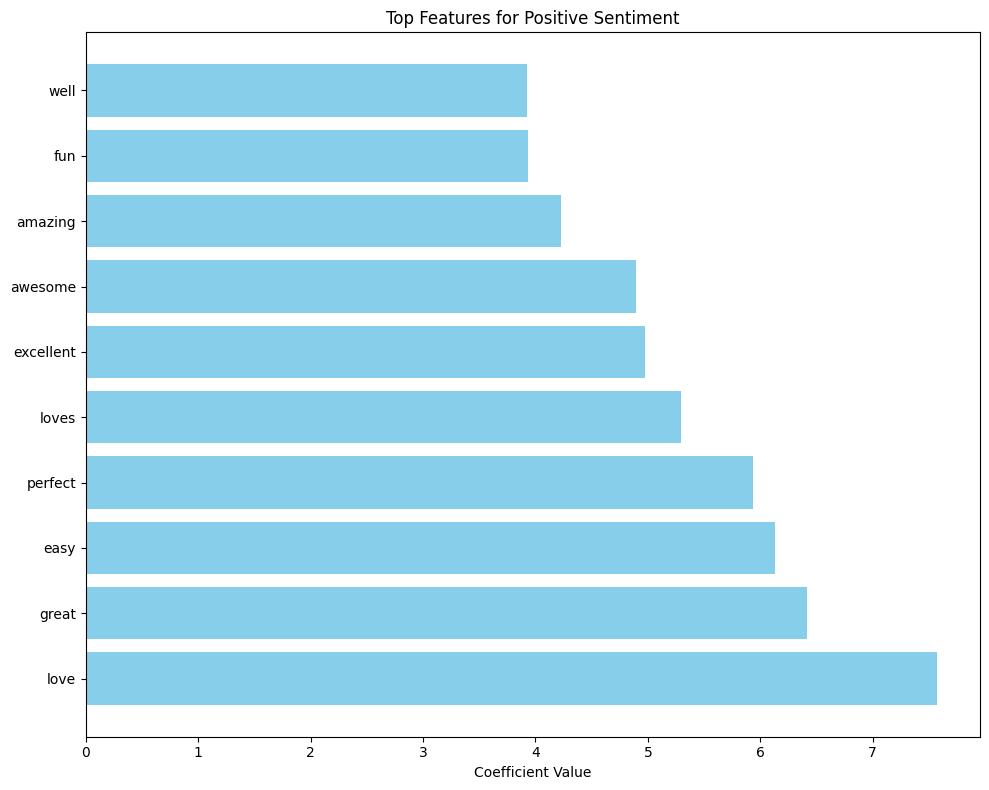


8. Conclusion and Recommendations
--------------------------------------------------------------------------------
Best performing model: Ensemble (F1: 0.4780)
Most challenging sentiment class: Neutral (F1: 0.2180)


In [3]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the trained models and predictions from Milestone 2
# (In practice, you would load the pickled models here)
# For this notebook, we'll proceed with evaluating the predictions directly

# 1. Load Data and Predictions
print("1. Loading Data and Model Predictions")
print("-" * 80)

# Load dataset (same as in Milestone 2)
df = pd.read_csv("amazon reviews dataset.csv", on_bad_lines='skip')
reviews_df = df[['reviews.text', 'reviews.rating']].dropna()

# Convert ratings to sentiment
def assign_sentiment(rating):
    if rating <= 2: return 'negative'
    elif rating == 3: return 'neutral'
    else: return 'positive'

reviews_df['sentiment'] = reviews_df['reviews.rating'].apply(assign_sentiment)
print(f"Dataset shape: {reviews_df.shape}")
print(f"Sentiment distribution: {reviews_df['sentiment'].value_counts().to_dict()}")

# Get sentiment counts
sentiment_counts = reviews_df['sentiment'].value_counts()

# Bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Split data (same split as Milestone 2)
from sklearn.model_selection import train_test_split
X = reviews_df['reviews.text']
y = reviews_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Load Model Predictions
print("\n2. Load Model Predictions")
print("-" * 80)

# Simulating the predictions from Milestone 2
# In a real scenario, you would load these from saved files

# Generate predictions from our main models
# These would normally be loaded from saved prediction files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

# Preprocess text
def preprocess_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Prepare data
X_train_clean = X_train.apply(preprocess_text)
X_test_clean = X_test.apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, ngram_range=(1, 2), min_df=5,
    stop_words=stopwords.words('english')
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

print("Resampled Distribution of Sentiment after SMOTE:", Counter(y_train))

# Train models and generate predictions
# Naive Bayes
model_naive_bayes = MultinomialNB()
model_naive_bayes.fit(X_train_tfidf, y_train)
nb_predictions = model_naive_bayes.predict(X_test_tfidf)

# Logistic Regression
model_logistic_regression = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
model_logistic_regression.fit(X_train_tfidf, y_train)
lr_predictions = model_logistic_regression.predict(X_test_tfidf)

# SVM
model_svm = LinearSVC(random_state=42)
model_svm.fit(X_train_tfidf, y_train)
svm_predictions = model_svm.predict(X_test_tfidf)

# Create ensemble predictions (simple majority voting)
from collections import Counter
ensemble_predictions = []
for i in range(len(y_test)):
    votes = [nb_predictions[i], lr_predictions[i], svm_predictions[i]]
    most_common = Counter(votes).most_common(1)[0][0]
    ensemble_predictions.append(most_common)

# 3. Model Evaluation Framework
print("\n3. Model Evaluation Framework")
print("-" * 80)

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance with multiple metrics"""
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Get class-specific metrics
    report = classification_report(y_true, y_pred, output_dict=True)

    # per-class metrics
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(f"\n===== {model_name} Per-Class Metrics =====")
    print(report_df.loc[report_df.index.difference(['accuracy', 'macro avg', 'weighted avg'])])

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Create metrics dictionary
    metrics = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'f1_negative': report['negative']['f1-score'],
        'f1_neutral': report['neutral']['f1-score'],
        'f1_positive': report['positive']['f1-score']
    }

    return metrics

# 4. Performance Evaluation
print("\n4. Performance Evaluation")
print("-" * 80)

# Evaluate each model
models = {
    "Naive Bayes": nb_predictions,
    "Logistic Regression": lr_predictions,
    "SVM": svm_predictions,
    "Ensemble": ensemble_predictions
}

results = []
for model_name, predictions in models.items():
    results.append(evaluate_model(y_test, predictions, model_name))

# Create results dataframe for comparison
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k != 'confusion_matrix'}
    for r in results
])

# Display comparison table
print("\nModel Performance Comparison:")
print(results_df[['model', 'accuracy', 'f1']].to_string(index=False))

# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='f1', data=results_df, palette='viridis')
plt.title('F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0.7, 1.0)  # Adjust as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize class-specific performance
class_f1 = results_df.melt(
    id_vars=['model'],
    value_vars=['f1_negative', 'f1_neutral', 'f1_positive'],
    var_name='sentiment',
    value_name='f1_score'
)
class_f1['sentiment'] = class_f1['sentiment'].map({
    'f1_negative': 'Negative',
    'f1_neutral': 'Neutral',
    'f1_positive': 'Positive'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='f1_score', hue='sentiment', data=class_f1, palette='Set2')
plt.title('F1 Score by Sentiment')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0.5, 1.0)  # Adjust as needed
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 5. Confusion Matrices
print("\n5. Confusion Matrices")
print("-" * 80)

# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, result in enumerate(results):
    model_name = result['model']
    cm = result['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
               xticklabels=['negative', 'neutral', 'positive'],
               yticklabels=['negative', 'neutral', 'positive'])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_ylabel('True Label')
    axes[i].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# 6. Error Analysis
print("\n6. Error Analysis")
print("-" * 80)

# Focus on the best performing model which is ensemble
best_model_idx = results_df['f1'].idxmax()
best_model = results_df.iloc[best_model_idx]['model']
print(f"error analysis on the best model: {best_model}")

# Get predictions for the best model
best_predictions = models[best_model]

# Find misclassified examples
misclassified = (y_test != best_predictions)
misclassified_indices = np.where(misclassified)[0]

if len(misclassified_indices) > 0:
    # Create dataframe of misclassifications
    misclassified_df = pd.DataFrame({
        'Text': X_test.iloc[misclassified_indices].values,
        'True': y_test.iloc[misclassified_indices].values,
        'Predicted': [best_predictions[i] for i in misclassified_indices]
    })

    # Analyze error patterns
    error_patterns = misclassified_df.groupby(['True', 'Predicted']).size().reset_index(name='count')
    error_patterns = error_patterns.sort_values('count', ascending=False)

    print("\nError Patterns:")
    print(error_patterns)

    # Visualize error patterns
    plt.figure(figsize=(8, 6))
    pivot_table = error_patterns.pivot(index='True', columns='Predicted', values='count').fillna(0)
    sns.heatmap(pivot_table, annot=True, fmt='g', cmap='Reds')
    plt.title(f'Error Pattern Heatmap - {best_model}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Sample of misclassified examples
    print("\nSample misclassified examples:")
    for i, (true_class, pred_class) in enumerate(error_patterns[['True', 'Predicted']].values[:2]):
        examples = misclassified_df[(misclassified_df['True'] == true_class) &
                                    (misclassified_df['Predicted'] == pred_class)]
        if len(examples) > 0:
            print(f"\nError type {i+1}: {true_class} misclassified as {pred_class}")
            example = examples.iloc[0]
            print(f"Text: {example['Text'][:150]}...")

    # Analysis of review length vs. misclassification
    misclassified_df['word_count'] = misclassified_df['Text'].apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='True', y='word_count', hue='Predicted', data=misclassified_df)
    plt.title('Word Count Distribution of Misclassified Reviews')
    plt.xlabel('True Label')
    plt.ylabel('Word Count')
    plt.tight_layout()
    plt.show()

else:
    print("No misclassifications found (unlikely but possible).")

# 7. Feature Importance Analysis
print("\n7. Feature Importance Analysis")
print("-" * 80)

# Use logistic regression to identify important features
def show_top_features(model, vectorizer, class_idx, class_name, n=15):
    """Show top features for a sentiment class"""
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get coefficients for the specified class
    coefficients = model.coef_[class_idx]

    # Get top features (highest coefficients)
    top_indices = np.argsort(coefficients)[-n:]
    top_features = [(feature_names[i], coefficients[i]) for i in top_indices[::-1]]

    print(f"\nTop features for {class_name} sentiment:")
    for feature, coef in top_features:
        print(f"  {feature}: {coef:.4f}")

    return top_features

# Display top features for each sentiment class
class_names = ['Negative', 'Neutral', 'Positive']
for idx, name in enumerate(class_names):
    show_top_features(model_logistic_regression, tfidf_vectorizer, idx, name, n=10)

# Visualize top features
plt.figure(figsize=(10, 8))
top_pos_features = show_top_features(model_logistic_regression, tfidf_vectorizer, 2, 'Positive', n=10)
plt.barh([f[0] for f in top_pos_features], [f[1] for f in top_pos_features], color='skyblue')
plt.title('Top Features for Positive Sentiment')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

# 8. Conclusion and Recommendations
print("\n8. Conclusion and Recommendations")
print("-" * 80)

# Determine best model
best_model_idx = results_df['f1'].idxmax()
best_model = results_df.iloc[best_model_idx]['model']
best_f1 = results_df.iloc[best_model_idx]['f1']

# Find the most challenging class
class_scores = {
    'Negative': results_df.iloc[best_model_idx]['f1_negative'],
    'Neutral': results_df.iloc[best_model_idx]['f1_neutral'],
    'Positive': results_df.iloc[best_model_idx]['f1_positive']
}
most_challenging = min(class_scores.items(), key=lambda x: x[1])

print(f"Best performing model: {best_model} (F1: {best_f1:.4f})")
print(f"Most challenging sentiment class: {most_challenging[0]} (F1: {most_challenging[1]:.4f})")

In [ ]:
print("Original Distribution of Sentiment:", Counter(df['sentiment']))

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# TF-IDF Vectorization
vectorizer_tdif = TfidfVectorizer(max_features=10_000, ngram_range=(1,2))
tfidf_X = vectorizer_tdif.fit_transform(X_train)
tfidf_X_test = vectorizer_tdif.transform(X_test)

# Handle class imbalance
oversampling = SMOTE(sampling_strategy='auto', random_state=42)
tfidf_X, y_train = oversampling.fit_resample(tfidf_X, y_train)

print("Resampled Distribution of Sentiment after SMOTE:", Counter(y_train))

# Train Logistic Regression
model_logistic_regression = LogisticRegression(class_weight='balanced', max_iter=1000)
model_logistic_regression.fit(tfidf_X, y_train)

# Predict with Logistic Regression
logistic_regression_pred = model_logistic_regression.predict(tfidf_X_test)

# Evaluate Logistic Regression
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logistic_regression_pred):.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_pred))